

# Project: Investigate a Dataset (No Show Medical Appointments)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Data Set**: No-show appointments dataset collects collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment
>* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
>* ‘Neighborhood’ indicates the location of the hospital.
>* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program.
>* ‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

> **Questions to be investigated:**
>* 1- What are the most factors that matter the most of ('Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'AppointmentDay'), to make the patient Show-Up to his appiontment?
>* 2- What is the relation between Scholarship & showed up patients?
>* 3- Do appointment no-shows occur more on specific days of the week?
>* 4- Do no-shows have a larger waiting period between schedule date and appointment date?
>* 5- Does the patient's age affect his showed up for appointment? 


###  Importing the required packages 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### Loading Data:

In [2]:

df = pd.read_csv('noshowappointments.csv')
df.head(20)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### Assessing and Building Intuition: 

##### Reviewing data & Checking for null values:

In [3]:
# check the datatypes of the columns, and the missing value
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 <font color=green> 
 - There is no null values.
 - The(ScheduledDay & AppointmentDay )Data type need to be converted to DateTime and Removing the timestamp.</font> 

In [4]:
# check for duplicate
print(sum(df.duplicated()))

0


<font color=green> * No duplicate data</font> 

In [5]:
# View the range of values in each column to check for any odd numbers.
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<font color=green> 
  - Minimum Age is '-1' and this is illogical, need to be fixed. </font> 

In [6]:
# preafe of the data.

df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [7]:
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


> **Observations**:
 - need to fix typos in some columns names.
 - need to specify the the appointment day.
 - need to calculate the period between the Scheduled Day and the Appointment Date.
 - neet to mapp no show data to 0/1.
 - need to create values for who showed up and didn't for comparison with other factors.

## Data Cleaning: 

### FIxing Age <= 0:

count ages with values =< 0, to decide how to fix it

In [8]:

sum(df["Age"] <= 0)

3540

since we have 3540 patients with age =< 0 it is better to replace them with the average then drop them

In [9]:
# Calculate the Aage average. 

meanAge = df['Age'].mean()
meanAge=int(round(meanAge))
meanAge

37

In [10]:
# Set the average to 0 <= values
# then check if we still have 0 <= values. 

df['Age']=df.Age.mask(df.Age <= 0,meanAge)
sum(df["Age"] <= 0)

0

### Converting the (ScheduledDay & AppointmentDay ) to DateTime and Removing the timestamp:

In [11]:

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Fixing typos in columns names: 

In [12]:
df.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

### Specifying the the appointment day.

In [13]:
df.rename(columns = {'AppointmentDay': 'AppointmentDate'}, inplace = True)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDate']).apply(lambda x: x.isoweekday())

df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentDay
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,5
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,5
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,5
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,5
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,5
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,5
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,5
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,5
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,5
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,5


### Calculate the time period between the scheduled day and the appointment day, and add a column for the result.

In [14]:
df['WaitingPeriod'] = df["AppointmentDate"].sub(df["ScheduledDay"], axis=0)
df["WaitingPeriod"] = round((df["WaitingPeriod"] / np.timedelta64(1, 'D')))
#                            .abs())# abs for negative values
df.sort_values(by='WaitingPeriod', ascending=True, inplace=True)
df.head(10)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentDay,WaitingPeriod
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,4,-6.0
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2,-1.0
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,3,-1.0
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2,-1.0
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,1,-1.0
57785,6.357872e+13,5657787,M,2016-05-04,2016-05-04,46,NOVA PALESTINA,0,0,0,0,0,0,Yes,3,0.0
57786,7.758559e+12,5711827,F,2016-05-18,2016-05-18,48,NOVA PALESTINA,0,0,0,0,0,0,No,3,0.0
57787,8.867813e+12,5735495,F,2016-05-25,2016-05-25,58,NOVA PALESTINA,0,1,0,0,0,0,No,3,0.0
57788,3.996494e+14,5713274,M,2016-05-18,2016-05-18,56,NOVA PALESTINA,0,0,1,0,0,0,No,3,0.0
57789,1.637135e+13,5735642,F,2016-05-25,2016-05-25,47,NOVA PALESTINA,0,0,0,0,0,0,Yes,3,0.0


Removeing Appointments with wrong dates,"the Appointment Day before the Scheduled Day"

In [15]:

df.drop(df[df.WaitingPeriod < 0].index, inplace=True)


### Mapping no show data to:
<ul> 
    0: Showed up to appointment / 1: did not show up to appointment to be able to calculate and visualization
</ul>

In [16]:

df.No_show.replace(['No', 'Yes'], [0,1], inplace=True)
df.head(10)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentDay,WaitingPeriod
57785,6.357872e+13,5657787,M,2016-05-04,2016-05-04,46,NOVA PALESTINA,0,0,0,0,0,0,1,3,0.0
57786,7.758559e+12,5711827,F,2016-05-18,2016-05-18,48,NOVA PALESTINA,0,0,0,0,0,0,0,3,0.0
57787,8.867813e+12,5735495,F,2016-05-25,2016-05-25,58,NOVA PALESTINA,0,1,0,0,0,0,0,3,0.0
57788,3.996494e+14,5713274,M,2016-05-18,2016-05-18,56,NOVA PALESTINA,0,0,1,0,0,0,0,3,0.0
57789,1.637135e+13,5735642,F,2016-05-25,2016-05-25,47,NOVA PALESTINA,0,0,0,0,0,0,1,3,0.0
57791,5.488287e+14,5711493,F,2016-05-18,2016-05-18,39,NOVA PALESTINA,0,0,0,0,0,0,0,3,0.0
57817,4.887225e+13,5653874,F,2016-05-03,2016-05-03,58,NOVA PALESTINA,0,1,0,0,0,0,0,2,0.0
57822,3.738399e+11,5653882,F,2016-05-03,2016-05-03,44,NOVA PALESTINA,1,0,1,0,0,0,1,2,0.0
57832,7.533561e+14,5707617,M,2016-05-17,2016-05-17,78,NOVA PALESTINA,0,1,0,0,0,0,0,2,0.0
57833,4.459446e+12,5731989,F,2016-05-24,2016-05-24,17,REDENÇÃO,0,0,0,0,0,0,0,2,0.0


### Creating values for who showed up and didn't for comparison with other factors.

In [17]:
not_showed = df['No_show'] == 1
showed = df['No_show'] == 0

df['showed'] = showed
df['not_showed'] = not_showed
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentDay,WaitingPeriod,showed,not_showed
102791,9.416259e+14,5134228,F,2015-12-07,2016-06-03,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,0,5,179.0,True,False
102790,9.965348e+14,5134243,M,2015-12-07,2016-06-03,73,MARUÍPE,0,1,1,0,0,0,0,5,179.0,True,False
102789,3.112342e+13,5134239,F,2015-12-07,2016-06-03,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,0,5,179.0,True,False
102786,4.542871e+11,5134227,M,2015-12-07,2016-06-03,67,MARUÍPE,0,1,1,0,0,0,0,5,179.0,True,False
102795,1.216587e+12,5134197,F,2015-12-07,2016-06-03,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,1,5,179.0,False,True


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 ( What are the most factors that matter the most of ('Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'AppointmentDay'), to make the patient Show-Up to his appiontment?)

In [18]:
columns = ['Gender','Scholarship','Hypertension','Diabetes','Alcoholism','SMS_received','AppointmentDay']
for r in columns :
    print(df.groupby(r)['No_show'].mean())

Gender
F    0.203113
M    0.199638
Name: No_show, dtype: float64
Scholarship
0    0.198031
1    0.237363
Name: No_show, dtype: float64
Hypertension
0    0.208992
1    0.173020
Name: No_show, dtype: float64
Diabetes
0    0.203589
1    0.180033
Name: No_show, dtype: float64
Alcoholism
0    0.201909
1    0.201488
Name: No_show, dtype: float64
SMS_received
0    0.166978
1    0.275745
Name: No_show, dtype: float64
AppointmentDay
1    0.206437
2    0.200874
3    0.196861
4    0.193494
5    0.212261
6    0.230769
Name: No_show, dtype: float64


<font color=green> *As we can see Scholarship and Appointment Day are the most factors that affect people who will attend or not!    
will investigate more on these.*</font> 


### Research Question 2  (What is the relation between Scholarship & showed up patients?)

__Visual distribution of patients with Scholarship for not showed up.__

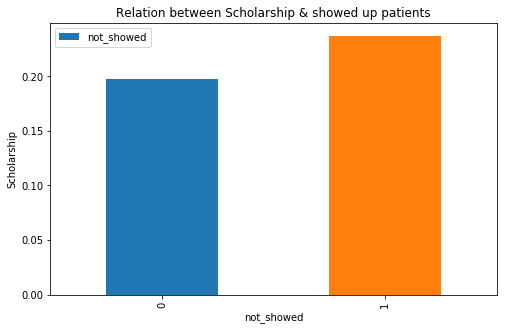

In [19]:
# Using group by function to find to the relation between people 
# who has scholarship and patients who showed up and who didn't.

df.groupby('Scholarship')['not_showed'].mean().plot(kind='bar',figsize=(8,5));
plt.xlabel("not_showed")
plt.ylabel("Scholarship")
plt.title("Relation between Scholarship & showed up patients")
plt.legend()

<font color=green> 
-  as we can see patiants with Scholarship are most likely to miss thier appointments.</font> 


### Research Question 3  (Do appointment not_showed occur on specific days of the week?)

__Visual distribution of Appointment Day for not showed up.__

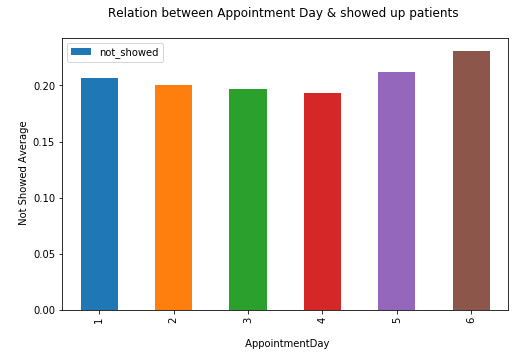

In [20]:
# Using group by function to find to the relation between the appointment day 
# and patients who didn't showed up.

df.groupby('AppointmentDay')['not_showed'].mean().plot(kind='bar',figsize=(8,5))
plt.ylabel("\n Not Showed Average")
plt.xlabel("\n AppointmentDay")
plt.title("Relation between Appointment Day & showed up patients \n")
plt.legend()

<font color=green> 
-  As we can see, no patient missed his appointment on Sunday, but maybe the hospital is closed on this day
-  The most no showed up is on Friday then Saturday, patients seem to be busy with the weekend activities..</font> 

### Research Question 4  (Do no-shows have a larger waiting period between schedule date and appointment date?)

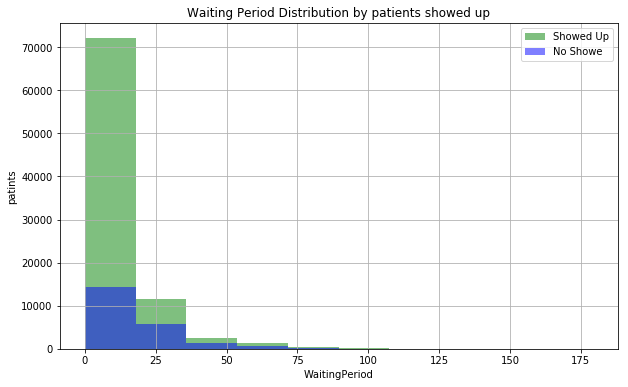

In [21]:
# Using group by function to find to the effect of booking the appointment very early. 

df.WaitingPeriod[showed].hist(alpha = 0.5, label= "Showed Up" ,color= 'g',figsize=(10,6))
df.WaitingPeriod[not_showed].hist( alpha = 0.5, label= "No Showe",color= 'b' )
plt.xlabel('WaitingPeriod')
plt.ylabel('patints')
plt.title("Waiting Period Distribution by patients showed up")
plt.legend()

<font color=green> 
-  Appointments with a waiting period of more than 20 days increase the probability of not showing
-  There is a correlation between the waiting period and the appointment show rate</font> 


### Research Question 5  (Does the patient's age affect his showed up for appointment?)

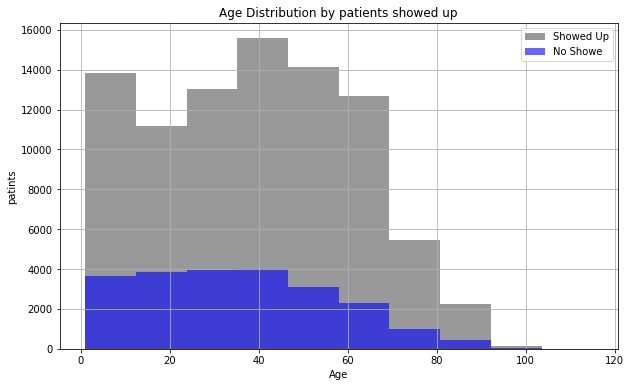

In [22]:
df.Age[showed].hist(alpha = 0.4, label= "Showed Up" ,color= 'k',figsize=(10,6))
df.Age[not_showed].hist( alpha = 0.6, label= "No Showe",color= 'b' ,figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('patints')
plt.title("Age Distribution by patients showed up")
plt.legend()

<font color=green> 
-  As we can see, adults patients are the most how not showing up. 
-  And patients between 35 and 57 the most attend their appointments. </font> 

<a id='conclusions'></a>
## Conclusions

#### Summarize findings:

>* patiants with Scholarship are most likely to miss thier appointments. 
>* Patients missed the Tuesday appointments more than other days and the less in Thursday, we can say that mid-week appointments have a lower no_show  rate.
>* There is a correlation between the waiting period and the appointment show rate; it may give a valuable prediction if it joined with other factors.
>* Most missed appointments are by patients between 12 to 24 years old,and the most attend are between 36 to 45. years old.
>* There is no significant relationship between patient health and patient Show-Up to his appiontment.

#### limitations:

>* Clarifying the type of appointment (Consultation, Follow-up, Operation ....) and also the specialization (Eyes, Dental....) could allow us to better understand influencers on no-show rates.
>* Not mentioned whether this appointment is the first visit or not.
>* The employment information may have a significant impact to show if the patient is employed or not.



##### Resources
>* https://jakevdp.github.io/PythonDataScienceHandbook/
>* https://stackoverflow.com
>* https://realpython.com/python-matplotlib-guide/
>* http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot